In [1]:
import pandas as pd

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [3]:
y = pd.read_csv("AAPL_quarterly_financials.csv")

In [4]:
y.index = y.name

In [5]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:,:]

In [6]:
y.index = pd.to_datetime(y.index)

In [7]:
# CHECK IF NAS ARE NO DIVIDEND PERIOD
y = y.sort_index().fillna(0.)

# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data

In [8]:
from pytrends.request import TrendReq

In [10]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["iPhone", "Anroid","Samsung","iPad","Mac","Buy iPhone", "Sell iPhone","UCLA","NBA","Hospital"]  # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [11]:
df = df.resample("Q").mean()

In [13]:
# ALIGN DATA
temp = pd.concat([y, df],axis = 1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()

# 3.) Normalize all the X data

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [23]:
import matplotlib.pyplot as plt

In [16]:
from sklearn.linear_model import Lasso

In [17]:
lasso = Lasso(alpha=0.1)
lasso = lasso.fit(X_scaled[:-2],y)

In [18]:
lasso.coef_

array([ 0.08831376, -0.        ,  0.        ,  0.        , -0.24637023,
        0.        ,  0.        , -0.04180433,  0.        ,  0.        ])

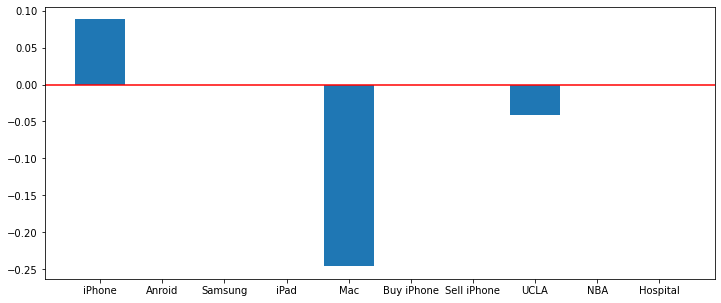

In [28]:
plt.figure(figsize = (12,5))
plt.bar(X.columns, lasso.coef_)
plt.axhline(0, color = "red")
plt.show()

# 5.) Do these coefficient magnitudes make sense?

#### The plot maskes sense to some extent. While I think iphone, ipad, mac, buy iphone, sell iphone have impacts on the APPL EPS, UCLA, NBA, and hospital should have no impact on AAPL EPS.